## Laboratorio 03
Elaborar:

1. Con el dataset elaborado, construir una red neuronal convolucional que permita identificar (clasificar) las diferentes flores que se puedan obtener a partir de una imagen fotografica, es decir se deben utilizar el dataset para entrenar y validar la efectividad del modelo desarrollado, se debe aplicar las tenicas que considere necesarias de las revisadas para lograr obtener los mejores parametros para el modelo. Las pruebas de la efectividad se realizaran con imagenes que se capturaran con una camara fotográfica.

2. Realizar lo solicitado en el punto 1, pero utilizando un modelo preentrenado y aplicando tecnicas de transfer learning y fine tunning.

Se debe elaborar un informe en relacion a los resultados que se obtengan en cada parte del trabajo.

El cuadernillo a presentar solo debe tener informacion que el estudiante considere necesaria.

Se debe subir el cuadernillo a ecampus y a su repositorio, para lo cual se debe incluir la dirección del mismo.

Se recomienda realizar un trabajo responsable y detallado, por cuanto este trabajo tiene una calificación especial y es parte del examen del primer parcial, por lo cual codigos que se identifiquen copia o no sean adecuadamente defendidos seran considerados como copia o no validos.

In [1]:
#Crear carpetas para subir las imagenes

!mkdir clavelEstrella
!mkdir rafines
!mkdir matricariaTetraBlanca
!mkdir monteCasino
!mkdir florAlfa


In [2]:
#Instalar unrar para descompirmir los archivos .rar
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [3]:
#Descompresion
%cd clavelEstrella
!unrar x Clavel_estrella.rar
%cd ..

%cd rafines
!unrar x Rafines.rar
%cd ..

%cd matricariaTetraBlanca
!unrar x Matricaria_Tetra_Blanca.rar
%cd ..

%cd monteCasino
!unrar x Montecasino.rar
%cd ..

%cd florAlfa
!unrar x Flor_alfa.rar
%cd ..

/content/clavelEstrella

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from Clavel_estrella.rar

Extracting  clavel_estrella_0.jpg                                          0%  OK 
Extracting  clavel_estrella_1.jpg                                          0%  OK 
Extracting  clavel_estrella_2.jpg                                          0%  OK 
Extracting  clavel_estrella_3.jpg                                          0%  OK 
Extracting  clavel_estrella_4.jpg                                          0%  OK 
Extracting  clavel_estrella_5.jpg                                          1%  OK 
Extracting  clavel_estrella_6.jpg                                          1%  OK 
Extracting  clavel_estrella_7.jpg                                          1%  OK 
Extracting  clavel_estrella_8.jpg                                          1%  OK 
Extracting  clavel_estrella_9.jpg  

In [5]:
#Borrar rar
!rm -rf /content/clavelEstrella/Clavel_estrella.rar
!rm -rf /content/rafines/Rafines.rar
!rm -rf /content/matricariaTetraBlanca/Matricaria_Tetra_Blanca.rar
!rm -rf /content/monteCasino/Montecasino.rar
!rm -rf /content/florAlfa/Flor_alfa.rar

In [6]:
!ls clavelEstrella/ | wc -l
!ls rafines/ | wc -l
!ls matricariaTetraBlanca/ | wc -l
!ls monteCasino/ | wc -l
!ls florAlfa/ | wc -l

500
500
500
500
500


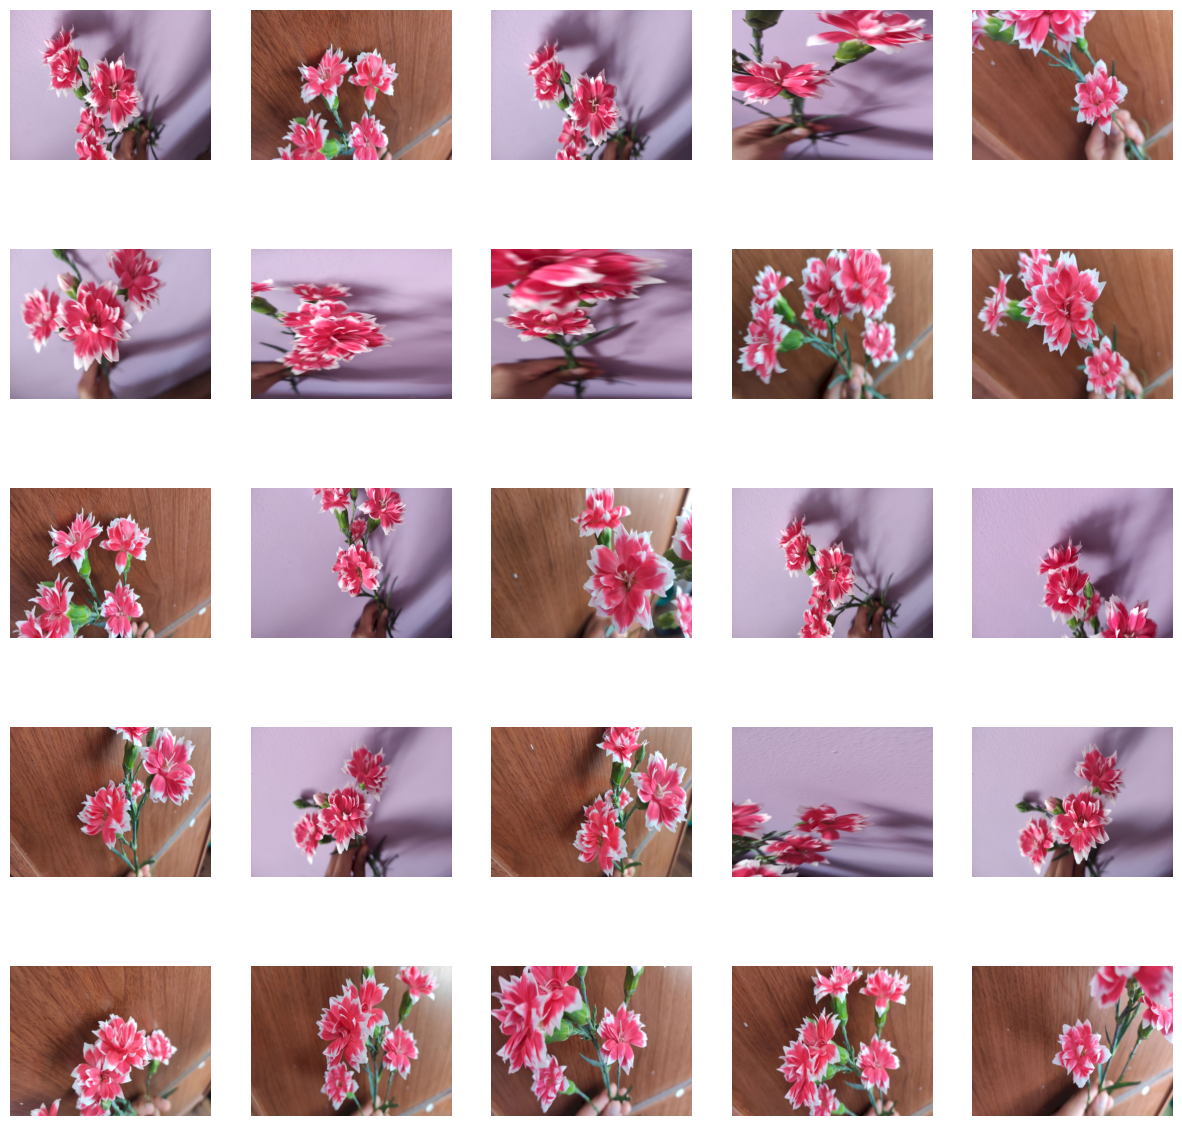

In [7]:
#mostramos imagenes

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


plt.figure(figsize=(15,15))

carpeta = '/content/clavelEstrella'
imagenes = os.listdir(carpeta)

for i, nombreimg in  enumerate(imagenes[0:25]):
  plt.subplot(5,5,i+1)
  img = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(img)
  plt.axis('off')

In [8]:
import os
import shutil

# Directorios originales (reemplázalos con las rutas correctas)
origenes = {
    "clavelEstrella": "/content/clavelEstrella",
    "rafines": "/content/rafines",
    "matricariaTetraBlanca": "/content/matricariaTetraBlanca",
    "monteCasino": "/content/monteCasino",
    "florAlfa": "/content/florAlfa"
}

# Directorio de destino
destino_base = "dataset_organizado"

# Crear estructura de carpetas
os.makedirs(destino_base, exist_ok=True)
for clase in origenes.keys():
    os.makedirs(os.path.join(destino_base, clase), exist_ok=True)

# Mover imágenes a la estructura nueva
for clase, origen in origenes.items():
    destino = os.path.join(destino_base, clase)
    for archivo in os.listdir(origen):
        if archivo.endswith(('.jpg', '.png', '.jpeg')):  # Filtrar solo imágenes
            shutil.copy(os.path.join(origen, archivo), os.path.join(destino, archivo))

print("Dataset organizado correctamente en:", destino_base)

Dataset organizado correctamente en: dataset_organizado


In [9]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Directorio del dataset organizado
dataset_path = "dataset_organizado"
train_path = "dataset_organizado/train"
test_path = "dataset_organizado/test"

# Crear carpetas de entrenamiento y prueba
for split in [train_path, test_path]:
    os.makedirs(split, exist_ok=True)

# Proporción de entrenamiento y prueba
split_ratio = 0.8  # 80% train, 20% test

# Recorrer las clases y dividirlas
for clase in os.listdir(dataset_path):
    clase_path = os.path.join(dataset_path, clase)

    # Ignorar directorios de train/test si ya existen
    if clase in ["train", "test"]:
        continue

    # Crear carpetas para la clase en train y test
    os.makedirs(os.path.join(train_path, clase), exist_ok=True)
    os.makedirs(os.path.join(test_path, clase), exist_ok=True)

    # Obtener lista de imágenes
    imagenes = [f for f in os.listdir(clase_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

    # Dividir en train y test
    train_imgs, test_imgs = train_test_split(imagenes, train_size=split_ratio, random_state=42)

    # Mover imágenes
    for img in train_imgs:
        shutil.move(os.path.join(clase_path, img), os.path.join(train_path, clase, img))
    for img in test_imgs:
        shutil.move(os.path.join(clase_path, img), os.path.join(test_path, clase, img))

print("División del dataset completada.")


División del dataset completada.


In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Definir las transformaciones para las imágenes
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionar las imágenes al tamaño estadndar
    transforms.ToTensor(),  # Convertir a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  #Normalizacion de pixeles de cada color y desviacion standar
])

# Cargar los datasets de entrenamiento y prueba desde las carpetas correspondientes
train_dataset = datasets.ImageFolder(root='./dataset_organizado/train', transform=transform)
test_dataset = datasets.ImageFolder(root='./dataset_organizado/test', transform=transform)

# Crear los DataLoaders para cada conjunto
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Obtener las clases del dataset
classes = train_dataset.classes
num_classes = len(classes)
print(f"Clases en el dataset: {classes}")


Clases en el dataset: ['clavelEstrella', 'florAlfa', 'matricariaTetraBlanca', 'monteCasino', 'rafines']


## Crear una Red Convolucional desde Cero (CNN)

In [11]:
import torch
import torch.nn as nn

# Bloque de convolución
def block(c_in, c_out, k=3, p=1, s=1, pk=2, ps=2):
    return nn.Sequential(
        nn.Conv2d(c_in, c_out, k, padding=p, stride=s),  # Capa convolucional
        nn.ReLU(),  # Función de activación ReLU
        nn.MaxPool2d(pk, stride=ps)  # Capa de MaxPooling
    )

# Definir la arquitectura de la CNN
class CNN(nn.Module):
    def __init__(self, n_channels=3, n_outputs=5):
        super(CNN, self).__init__()
        # Definir las capas convolucionales
        self.conv1 = block(n_channels, 64)  # Conv1 con 64 filtros
        self.conv2 = block(64, 128)  # Conv2 con 128 filtros
        self.conv3 = block(128, 256)  # Conv3 con 256 filtros
        # Capa completamente conectada para la clasificación final
        self.fc = nn.Linear(256 * 28 * 28, n_outputs)  # Ajustar el tamaño según las capas anteriores

    def forward(self, x):
        # Pasar por las capas convolucionales
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        # Aplanar (flatten) la salida antes de pasar por la capa totalmente conectada
        x = x.view(x.shape[0], -1)  # Redimensionar para la capa FC
        x = self.fc(x)  # Pasar a través de la capa totalmente conectada
        return x

# Crear el modelo
model = CNN(n_channels=3, n_outputs=5)

# Probar el modelo con una entrada aleatoria (simular imágenes 224x224)
output = model(torch.randn(64, 3, 224, 224))  # 64 imágenes de tamaño 224x224 con 3 canales
print("Output shape: ", output.shape)

Output shape:  torch.Size([64, 5])


In [12]:
from tqdm import tqdm
import numpy as np

def fit(model, train_loader, test_loader, epochs=5):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.CrossEntropyLoss()

    best_val_acc = 0

    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(train_loader)  # Usamos train_loader
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")

        # Evaluación en el conjunto de prueba
        bar = tqdm(test_loader)  # Usamos test_loader
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")

        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")


        # 🔐 Checkpoint - guardar solo si mejora la validación
        current_val_acc = np.mean(val_acc)


        if current_val_acc > best_val_acc:
          best_val_acc = current_val_acc
          torch.save({
              'epoch': epoch,
              'model_state_dict': model.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
              'val_acc': best_val_acc
          }, f'checkpoint_best.pth')
        print(f"✅ Checkpoint guardado: Epoch {epoch} con val_acc {best_val_acc:.5f}")

In [13]:
# Inicializamos el modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN(n_channels=3, n_outputs=5)  # 3 canales y 5 clases de flores
model.to(device)  # Mueve el modelo a la GPU si está disponible

# Entrenamos el modelo
fit(model, train_loader, test_loader, epochs=10)  # Ajusta el número de épocas



val_loss 0.04996 val_acc 0.98828: 100%|██████████| 16/16 [00:04<00:00,  3.70it/s]


Epoch 1/10 loss 0.40877 val_loss 0.04996 acc 0.87698 val_acc 0.98828
✅ Checkpoint guardado: Epoch 1 con val_acc 0.98828


val_loss 0.12322 val_acc 0.96016: 100%|██████████| 16/16 [00:03<00:00,  4.15it/s]


Epoch 2/10 loss 0.08993 val_loss 0.12322 acc 0.98016 val_acc 0.96016
✅ Checkpoint guardado: Epoch 2 con val_acc 0.98828


val_loss 0.12805 val_acc 0.97227: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]


Epoch 3/10 loss 0.06009 val_loss 0.12805 acc 0.98413 val_acc 0.97227
✅ Checkpoint guardado: Epoch 3 con val_acc 0.98828


val_loss 0.08039 val_acc 0.96172: 100%|██████████| 16/16 [00:03<00:00,  4.47it/s]


Epoch 4/10 loss 0.08920 val_loss 0.08039 acc 0.97966 val_acc 0.96172
✅ Checkpoint guardado: Epoch 4 con val_acc 0.98828


val_loss 0.07244 val_acc 0.97930: 100%|██████████| 16/16 [00:03<00:00,  4.40it/s]


Epoch 5/10 loss 0.09124 val_loss 0.07244 acc 0.97867 val_acc 0.97930
✅ Checkpoint guardado: Epoch 5 con val_acc 0.98828


val_loss 0.03975 val_acc 0.99492: 100%|██████████| 16/16 [00:03<00:00,  4.28it/s]


Epoch 6/10 loss 0.01310 val_loss 0.03975 acc 0.99554 val_acc 0.99492
✅ Checkpoint guardado: Epoch 6 con val_acc 0.99492


val_loss 0.01309 val_acc 0.99609: 100%|██████████| 16/16 [00:03<00:00,  4.35it/s]


Epoch 7/10 loss 0.02946 val_loss 0.01309 acc 0.99554 val_acc 0.99609
✅ Checkpoint guardado: Epoch 7 con val_acc 0.99609


val_loss 0.00600 val_acc 0.99609: 100%|██████████| 16/16 [00:03<00:00,  4.40it/s]


Epoch 8/10 loss 0.00297 val_loss 0.00600 acc 0.99901 val_acc 0.99609
✅ Checkpoint guardado: Epoch 8 con val_acc 0.99609


val_loss 0.03328 val_acc 0.98594: 100%|██████████| 16/16 [00:03<00:00,  4.01it/s]


Epoch 9/10 loss 0.00726 val_loss 0.03328 acc 0.99802 val_acc 0.98594
✅ Checkpoint guardado: Epoch 9 con val_acc 0.99609


val_loss 0.19709 val_acc 0.97227: 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]

Epoch 10/10 loss 0.14997 val_loss 0.19709 acc 0.98363 val_acc 0.97227
✅ Checkpoint guardado: Epoch 10 con val_acc 0.99609


In [14]:
# Evaluación del modelo con los datos de prueba
def evaluate(model, dataloader):
    model.eval()  # Establecemos el modelo en modo evaluación
    val_loss, val_acc = [], []

    with torch.no_grad():
        for batch in dataloader:
            X, y = batch
            X, y = X.to(device), y.to(device)
            y_hat = model(X)

            # Cálculo de la pérdida
            loss = torch.nn.CrossEntropyLoss()(y_hat, y)
            val_loss.append(loss.item())

            # Cálculo de la precisión
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            val_acc.append(acc)

    # Resultados promedio
    avg_loss = np.mean(val_loss)
    avg_acc = np.mean(val_acc)

    print(f"Test loss: {avg_loss:.5f} | Test accuracy: {avg_acc:.5f}")

# Llamamos a la función para evaluar el modelo
evaluate(model, test_loader)

Test loss: 0.19709 | Test accuracy: 0.97227


In [15]:
from PIL import Image
from torchvision import transforms

# Definir las transformaciones para las imágenes reales
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionamos la imagen
    transforms.ToTensor(),          # Convertimos la imagen en un tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalización
])

# Cargar la imagen real
img_path = '/content/florPrueba/flor1.jpeg'
image = Image.open(img_path)

# Aplicar las transformaciones a la imagen
image_tensor = transform(image).unsqueeze(0)


image_tensor = image_tensor.to(device)

# Realizar la predicción
model.eval()
with torch.no_grad():
    output = model(image_tensor)
    _, predicted_class = torch.max(output, 1)

# Mostrar el resultado
class_names = train_dataset.classes  # Extraemos los nombres de las clases
predicted_label = class_names[predicted_class.item()]
print(f"La imagen es clasificada como: {predicted_label}")


La imagen es clasificada como: clavelEstrella


## Modelo Pre Entrenado

In [16]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision import datasets
from tqdm import tqdm

In [17]:
# Cargar MobileNetV3 Large o Small preentrenado
model = models.mobilenet_v3_large(pretrained=True)  # Para la versión Large
# model = models.mobilenet_v3_small(pretrained=True)  # Para la versión Small

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 174MB/s]


In [18]:
# Definir el dispositivo (GPU si está disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [19]:
from torchvision import transforms
from PIL import Image

# Definir las transformaciones
preprocess = transforms.Compose([
    transforms.Resize(256),                  # Redimensionar a 256x256
    transforms.CenterCrop(224),              # Recortar a 224x224 (tamaño esperado)
    transforms.ToTensor(),                   # Convertir a tensor
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],         # Normalización estándar para ImageNet
        std=[0.229, 0.224, 0.225]
    ),
])

# Directorios del dataset
train_dir = "dataset_organizado/train"
test_dir = "dataset_organizado/test"

# Cargar datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Clases
num_classes = len(train_dataset.classes)
print("Clases:", train_dataset.classes)


Clases: ['clavelEstrella', 'florAlfa', 'matricariaTetraBlanca', 'monteCasino', 'rafines']


In [20]:
# Congelar todas las capas del modelo excepto la capa final
for param in model.parameters():
    param.requires_grad = False

In [21]:
# Modificar la capa final para el número correcto de clases
model.classifier[3] = torch.nn.Linear(model.classifier[3].in_features, num_classes)  # InceptionV3 tiene 2048 características de salida

# Mover el modelo a GPU si está disponible
model = model.to(device)

# Definir el criterio de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()  # Para clasificación multiclase
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Solo entrenar la nueva capa


In [22]:
import os

# Directorio donde se guardarán los checkpoints
checkpoint_dir = "./checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)  # Crear directorio si no existe


# Entrenamiento del modelo
num_epochs = 10
best_accuracy = None
for epoch in range(num_epochs):
    model.train()  # Ponemos el modelo en modo de entrenamiento
    running_loss = 0.0
    train_acc = 0.0

    # Entrenamiento
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Limpiar los gradientes
        outputs = model(images)  # Obtener las predicciones


        loss = criterion(outputs, labels)  # Calcular la pérdida

        loss.backward()  # Propagar los gradientes hacia atrás
        optimizer.step()  # Actualizar los parámetros

        running_loss += loss.item()

        # Calcular la exactitud
        _, preds = torch.max(outputs, 1)
        correct = torch.sum(preds == labels).item()
        train_acc += correct / labels.size(0)

    # Promedio de pérdida y exactitud
    print(f"Época [{epoch+1}/{num_epochs}], Pérdida: {running_loss / len(train_loader):.4f}, Exactitud: {train_acc / len(train_loader):.4f}")

    # 2. Guardar el MEJOR modelo (recomendado)
    epoch_acc = np.mean(train_acc)
    if best_accuracy is None:
          best_accuracy = 0
    if epoch_acc > best_accuracy:
        best_accuracy = epoch_acc
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': running_loss,
            'accuracy': epoch_acc,
        }, os.path.join(checkpoint_dir, "best_model.pt"))
        print(f"¡Mejor modelo guardado con exactitud {best_accuracy:.4f}!")

print("Entrenamiento finalizado.")

Época [1/10], Pérdida: 0.3717, Exactitud: 0.9420
¡Mejor modelo guardado con exactitud 59.3438!
Época [2/10], Pérdida: 0.0559, Exactitud: 0.9980
¡Mejor modelo guardado con exactitud 62.8750!
Época [3/10], Pérdida: 0.0320, Exactitud: 0.9980
Época [4/10], Pérdida: 0.0238, Exactitud: 0.9990
¡Mejor modelo guardado con exactitud 62.9375!
Época [5/10], Pérdida: 0.0142, Exactitud: 1.0000
¡Mejor modelo guardado con exactitud 63.0000!
Época [6/10], Pérdida: 0.0127, Exactitud: 0.9995
Época [7/10], Pérdida: 0.0098, Exactitud: 1.0000
Época [8/10], Pérdida: 0.0077, Exactitud: 1.0000
Época [9/10], Pérdida: 0.0079, Exactitud: 0.9995
Época [10/10], Pérdida: 0.0059, Exactitud: 1.0000
Entrenamiento finalizado.


In [23]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Precisión en test set: {accuracy:.2f}%")


Precisión en test set: 100.00%


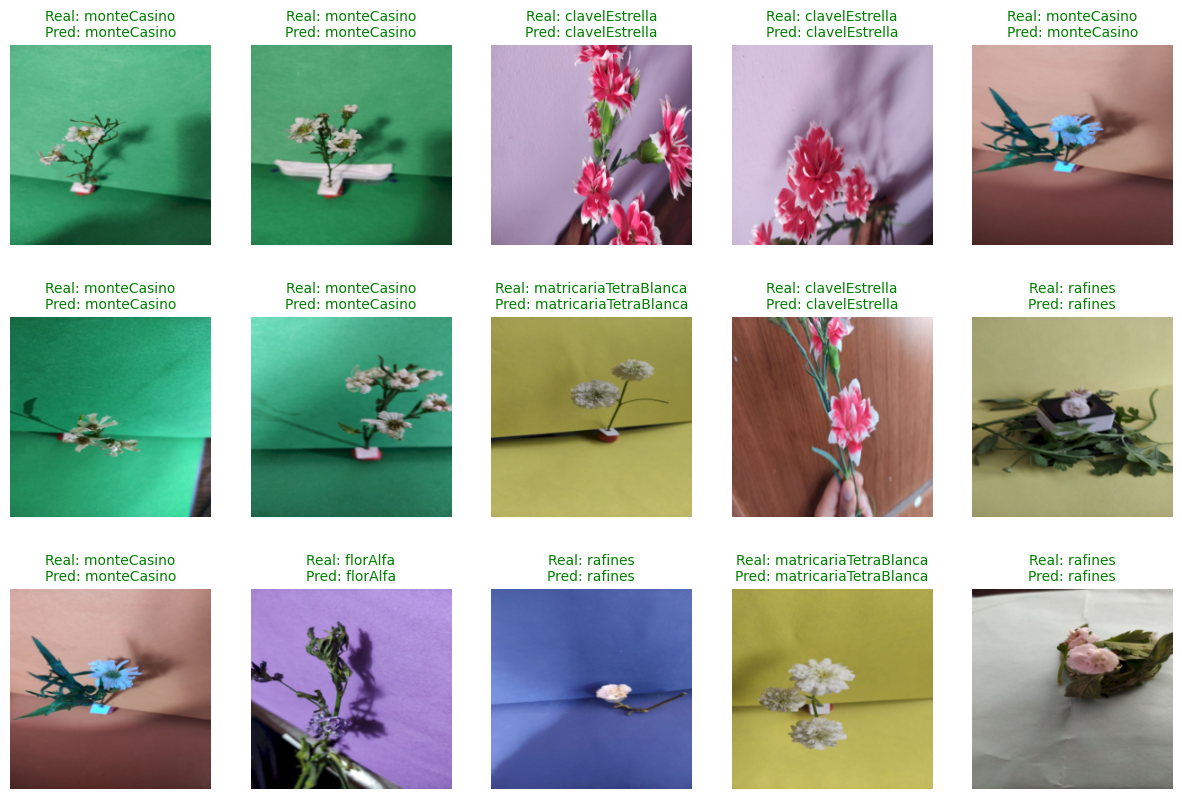

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import random

# Configurar el modelo en modo evaluación
model.eval()

# Obtener las clases del dataset
class_names = train_dataset.classes

fig, axes = plt.subplots(3, 5, figsize=(15, 10))

with torch.no_grad():
    for i in range(3):  # Filas
        for j in range(5):  # Columnas
            ix = random.randint(0, len(test_dataset) - 1)
            img, label = test_dataset[ix]
            img_tensor = img.unsqueeze(0).to(device)

            # Realizar predicción
            output = model(img_tensor)
            _, pred = torch.max(output, 1)

            img = img.numpy().transpose((1, 2, 0))
            img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
            img = np.clip(img, 0, 1)

            axes[i, j].imshow(img)
            axes[i, j].axis("off")

            color = "green" if pred.item() == label else "red"
            axes[i, j].set_title(f"Real: {class_names[label]}\nPred: {class_names[pred.item()]}", fontsize=10, color=color)

plt.show()


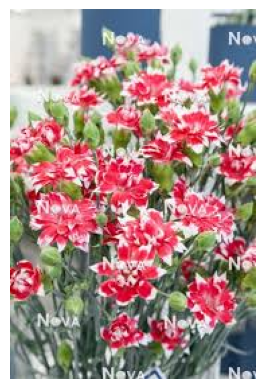

Predicción: clavelEstrella


In [25]:
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Definir las transformaciones para las imágenes reales
transform = transforms.Compose([
    transforms.Resize(256),                  # Redimensionar a 256x256
    transforms.CenterCrop(224),              # Recortar a 224x224 (tamaño esperado)
    transforms.ToTensor(),                   # Convertir a tensor
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],         # Normalización estándar para ImageNet
        std=[0.229, 0.224, 0.225]
    )
])


image_path = '/content/florPrueba/flor1.jpeg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


image = transform(image).unsqueeze(0)
image = image.to(device)

model.eval()

# Realizar la predicción
with torch.no_grad():
    outputs = model(image)

_, predicted_class = torch.max(outputs, 1)

# Mostrar la clase predicha
predicted_label = train_dataset.classes[predicted_class.item()]
print(f"Predicción: {predicted_label}")